In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import torch.nn as nn
import torch.nn.functional as F


######################################## 


#  Loading and normalizing CIFAR10

transform = transforms.Compose([transforms.ToTensor(), 
     transforms.Normalize((0.5,0.5,0.5), (0.5,0.5,0.5)),
     ])

# .Compose() composes several transformations together
# . ToTensor() convers images and np arrays into torch tensors
# .Normalize()

# Download CIFAR10 Dataset

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)


######################################## 



Files already downloaded and verified
Files already downloaded and verified


In [16]:
print(len(trainset))
len(testset)

50000


10000

In [3]:
batch_size = 100 # chosen
n_iters = 2500 # 50,000 / batch_size = 500 and 500 * 5=2500
num_epochs = n_iters / (len(trainset)/batch_size)
num_epochs = int(num_epochs)

# Load Data
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')


In [18]:
num_epochs

5

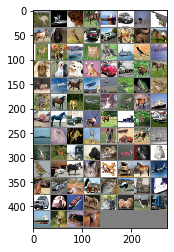

      bird      horse        dog      horse       bird        car       bird      plane      horse        dog


In [5]:
# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%10s' % classes[labels[j]] for j in range(10)))

In [6]:
class FNN(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(FNN, self).__init__()

        # Linear Function
        self.fc1 = nn.Linear(input_dim, hidden_dim) # has 2 params

        # Non Linearity
        self.relu = nn.ReLU()

        # second linear funtion
        self.fc2 = nn.Linear(hidden_dim, output_dim) # has 2 params
    
    def forward(self, x):
        # print("x size is {}".format(x.size()))

        #Linear Function
        out = self.fc1(x)

        # Non Linearity
        out = self.relu(out)

        # Linear Function (read out)
        out = self.fc2(out)

        # print("Final size is {}".format(out.size())
        return out

In [7]:
# define the model parameters
input_dim = 1024  # 32x32 image size = 1024 pixels
output_dim = 10  # 10 classes (animals)
hidden_dim = 500 # can be any number of neurons or non 

# model

model = FNN(input_dim,hidden_dim, output_dim)

In [8]:
# define the loss criteria and Optimizer

criterion = nn.CrossEntropyLoss() 
# Cross Entropy is good for classification
# its required to compute the loss btn softmax outputs and binary labels

optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [9]:
# display the number of params we have
  # 2 linear layers of the form Y = AX + B
    # Each linear layer has 2 params, A and B 
      # therfore we have A_1, A_2, B_1, and B_2
print(len(list(model.parameters())))

4


In [10]:
# fc1 slope params
print(list(model.parameters())[0].size())

# the first linear layer parameters for A_1 has size= [hidden_layer, input_dim]
  # hidden_layer = 100 and input_dim = 32 x 32

torch.Size([500, 1024])


In [11]:
# fc1 bias params
print(list(model.parameters())[1].size())

# this is the first linear layer params for bias B_1 with the size 100
  # since the dim of hidden layers is 100


torch.Size([500])


In [12]:
# fc2 slope params
print(list(model.parameters())[2].size())

# the second linear layer has size 10 x 100 for A_2. 
# the next size is the output size which is 10
# the input size from the previous operation is 100 (hidden layers)

torch.Size([10, 500])


In [13]:
# f2 bias params
print(list(model.parameters())[3].size())

# the second linear layer bias has size 10 since the output dim is 10

# and so the final output size will be 10x1


torch.Size([10])


In [14]:
def calc_accuracy(loaded_data, pixel):
    correct = 0
    total = 0
    
    for images, labels in loaded_data:
        images.images.view(-1, pixel,pixel).requires_grad_()
        
        outputs = model(images)
        _, predict = torch.max(outputs.data,1)
        
        # total number of labels
        total += labels.size(0)
        
        # correct predictions
        correct += (predict == lavels).sum()
        
    accuracy = correct / total * 100
    
    return accuracy

In [15]:
iteration = 1
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(trainloader):
        # load images with gradient accumulation capabilities
        images = images.view(-1, 32*32).requires_grad_()

        # clear gradients from previous iters w.r.t params
        optimizer.zero_grad()

        # forward pass to get outputs
        outputs = model(images)

        # Calculate loss: Softmax -> Cross Entropy Loss
        loss = criterion(outputs, labels)

        # getting gradients w.r.t params
        loss.backward()

        # updating params
        optimizer.step()

        iteration += 1

        # report every 500 iters
        if iteration % 500 == 0:
            accuracy = calc_accuracy(testloader, 32)
            
            print('Iter {} | Loss: {} | Accuracy: {}'.format(iteration, 
                                                             loss.item(),accuracy))
            

ValueError: Expected input batch_size (300) to match target batch_size (100).